In [1]:
#Importamos los paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Lectura de los archivos que se van a usar
df_D0=pd.read_csv("C:/master_ugr/TFM/resultados/abrolado_D0_nom_sp_DBH_altura.csv", delimiter=";", decimal=",")
df_DD=pd.read_csv("C:/master_ugr/TFM/resultados/quejigos_demas_dens_nom_sp_DBH_altura.csv", delimiter=";", decimal=",")

In [3]:
#Limpieza de los archivos
df_D0.columns=["id_visita","cod_sp","nom_sp","Altura_cm","DBH_cm"]

In [7]:
#Unión de los archivos en un dataframe
df= df_D0.merge(df_DD, how="outer")
df

,id_visita,cod_sp,nom_sp,Altura_cm,DBH_cm
0,1,7150,Quercus ilex L.,500.0,11.14
1,1,7150,Quercus ilex L.,500.0,11.14
2,1,7150,Quercus ilex L.,350.0,9.54
3,1,7150,Quercus ilex L.,600.0,16.55
4,1,7150,Quercus ilex L.,300.0,8.59
...,...,...,...,...,...
444,16,328,Quercus faginea Lam.,450.0,7.95
445,16,328,Quercus faginea Lam.,1000.0,24.19
446,16,328,Quercus faginea Lam.,750.0,26.10
447,16,328,Quercus faginea Lam.,900.0,21.96


In [8]:
#Optimización del dataframe
df_cod_nom = df.replace({328: "Quercus faginea", 
               7150: "Quercus ilex", 
               127 :"Pinus sp", 
               2247:"Fraxinus sp", 
               6206:"Cedrus atlantica"})
df_cod_nom

,id_visita,cod_sp,nom_sp,Altura_cm,DBH_cm
0,1,Quercus ilex,Quercus ilex L.,500.0,11.14
1,1,Quercus ilex,Quercus ilex L.,500.0,11.14
2,1,Quercus ilex,Quercus ilex L.,350.0,9.54
3,1,Quercus ilex,Quercus ilex L.,600.0,16.55
4,1,Quercus ilex,Quercus ilex L.,300.0,8.59
...,...,...,...,...,...
444,16,Quercus faginea,Quercus faginea Lam.,450.0,7.95
445,16,Quercus faginea,Quercus faginea Lam.,1000.0,24.19
446,16,Quercus faginea,Quercus faginea Lam.,750.0,26.10
447,16,Quercus faginea,Quercus faginea Lam.,900.0,21.96


In [9]:
#limpieza del dataframe
df_nom=df_cod_nom.drop(["nom_sp"], axis=1)
df_nom

,id_visita,cod_sp,Altura_cm,DBH_cm
0,1,Quercus ilex,500.0,11.14
1,1,Quercus ilex,500.0,11.14
2,1,Quercus ilex,350.0,9.54
3,1,Quercus ilex,600.0,16.55
4,1,Quercus ilex,300.0,8.59
...,...,...,...,...
444,16,Quercus faginea,450.0,7.95
445,16,Quercus faginea,1000.0,24.19
446,16,Quercus faginea,750.0,26.10
447,16,Quercus faginea,900.0,21.96


In [10]:
df_nom.columns = ["id_visita", "nombre_especie", "altura_cm", "DBH_cm"]

In [11]:
#Selección de los campos de interés
faginea = df_nom["nombre_especie"] == "Quercus faginea"
df_faginea=df_nom[faginea]
df_faginea
# df_faginea.to_csv('clases_altura_DBH_histograma.csv', sep=';')

,id_visita,nombre_especie,altura_cm,DBH_cm
7,1,Quercus faginea,400.0,11.77
12,1,Quercus faginea,800.0,14.96
13,1,Quercus faginea,850.0,16.87
17,1,Quercus faginea,700.0,15.27
18,1,Quercus faginea,800.0,17.82
...,...,...,...,...
444,16,Quercus faginea,450.0,7.95
445,16,Quercus faginea,1000.0,24.19
446,16,Quercus faginea,750.0,26.10
447,16,Quercus faginea,900.0,21.96


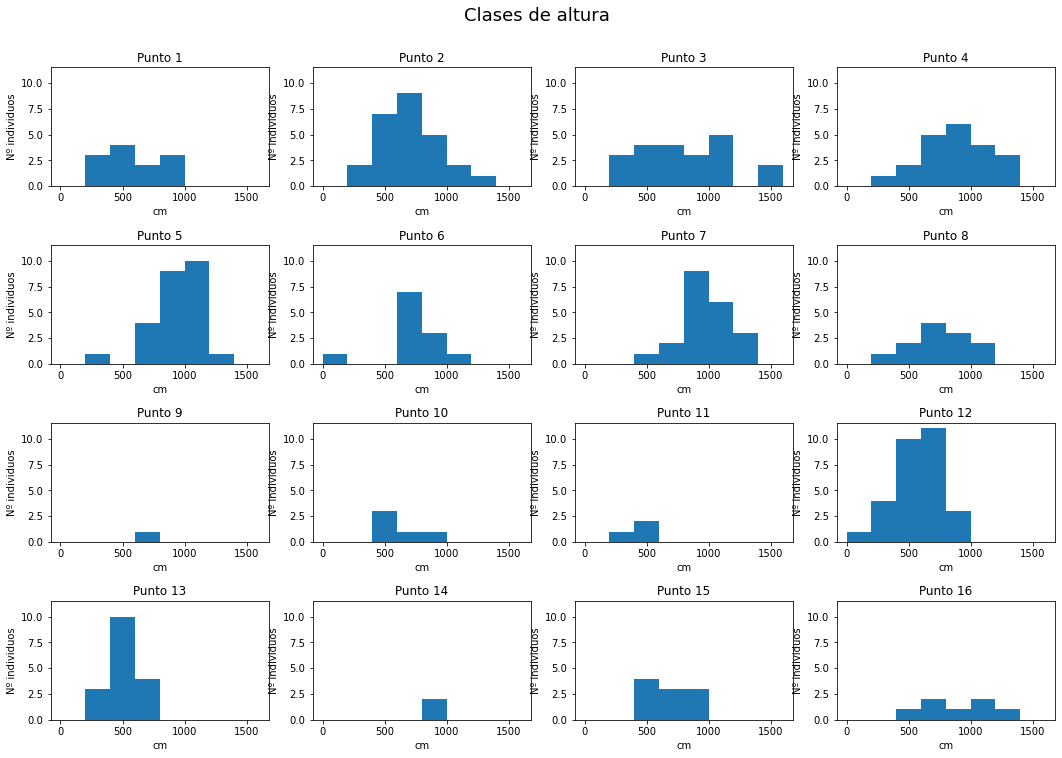

In [44]:
#Visualización de los histogramas de altura
visitas = range(1,17)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (18,12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Clases de altura", fontsize=18, y=0.95)

for i, ax in zip(visitas, axs.ravel()):
    id_visita = df_faginea["id_visita"] == i
    df_id_visita = df_faginea[id_visita]
    df_id_visita["altura_cm"].plot(ax=ax, kind= "hist", bins = np.arange(0, 1800, 200))
    ax.set_title("Punto " + str(i))
    # ax.set_title(id_visita.upper())
    # ax.get_legend().remove()
    ax.set_xlabel("cm")
    ax.set_ylabel("Nº individuos")
    ax.set_ylim(0,11.5)
    # plt.savefig("subplt_histograma_altura_f.jpg", bbox_inches="tight")   

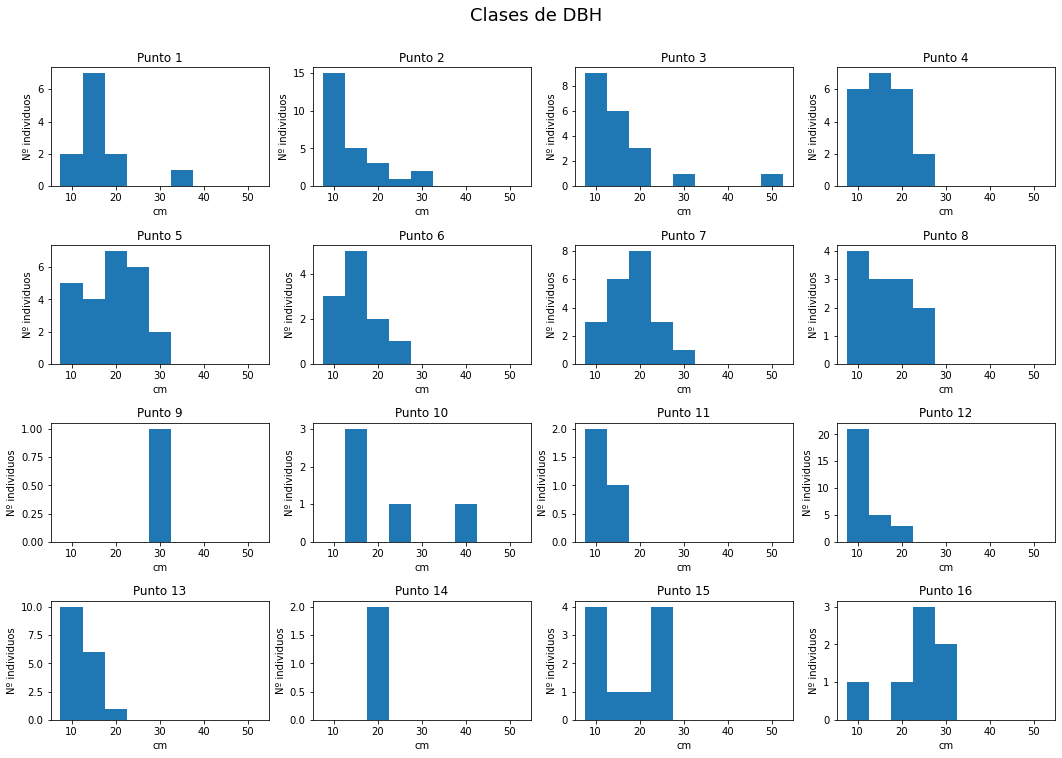

In [36]:
#Visualización de los histogramas de DBH
fig, axs = plt.subplots(4,4, figsize = (18,12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Clases de DBH", fontsize=18, y=0.95)

for i, ax in zip(visitas, axs.ravel()):
    id_visita = df_faginea["id_visita"] == i
    df_id_visita = df_faginea[id_visita]
    df_id_visita["DBH_cm"].plot(ax=ax, kind= "hist", bins=np.arange(7.5, 55, 5))
    ax.set_title("Punto " + str(i))
    # ax.set_title(id_visita.upper())
    # ax.get_legend().remove()
    ax.set_xlabel("cm")
    ax.set_ylabel("Nº individuos")
    # ax.set_ylim(0,9.5)
    # plt.savefig("subplt_histograma_DBH.jpg", bbox_inches="tight")    